In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

## Finding relationship in random data

#### Generate random data  
At the first step we will create 2 random set of numbers that don't depend on each other.  
Let's generate 100,000 observations drawn from the uniform distribution with values between 0 and 100 for each set.

In [2]:
# draw samples from uniform distribution
a = stats.uniform.rvs(loc=0, scale=100, size=100000)
b = stats.uniform.rvs(loc=0, scale=100, size=100000)

# calculate Pearson correlation
cor = stats.pearsonr(x=a, y=b)[0]

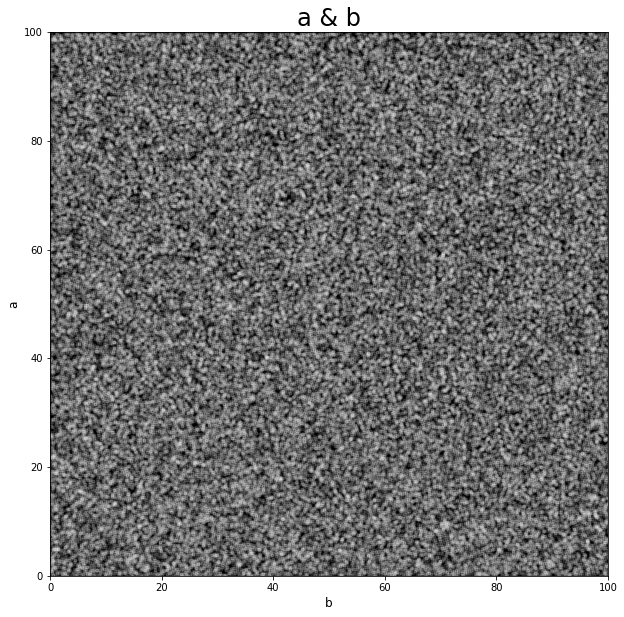

In [3]:
# plot the data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x=a, y=b, marker='.', color='white', alpha=0.1)
ax.set_facecolor('black')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('b', fontsize=12)
plt.ylabel('a', fontsize=12)
plt.title('a & b', fontsize=24)
plt.show();

In [4]:
print('Pearson correlation: {}'.format(round(cor, 3)))

Pearson correlation: 0.001


Correlation between the data points is ~0.

#### Review data samples randomly drawn from the data  

Now let's randomly extract 5 observations and calculate correlation for it.

In [7]:
# generate random indexes
i = np.random.randint(low=0, high=99999, size=5)

# extract elements with generated indexes from the samples
a_i = a[i]
b_i = b[i]

# calculate correlation
cor = stats.pearsonr(x=a_i, y=b_i)[0]
print(cor)

0.6680349043651804


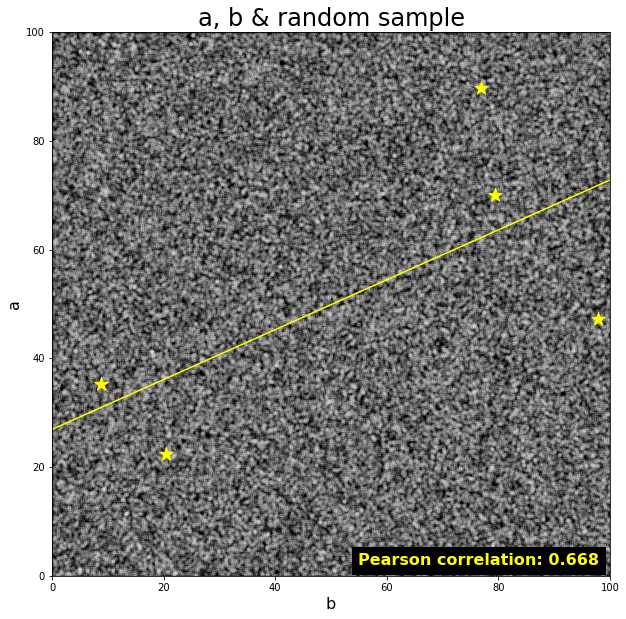

In [8]:
model = LinearRegression()
model.fit(np.reshape(b_i, (len(b_i), 1)), a_i)

b_new = np.linspace(0, 100, 100)
a_new = model.predict(b_new[:, np.newaxis])

# plot the data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x=b, y=a, marker='.', color='white', alpha=0.1)
ax.scatter(x=b_i, y=a_i, marker='*', color='yellow', s=200)
ax.plot(b_new, a_new, color='yellow')
ax.text(
    s='Pearson correlation: {}'.format(round(cor, 3)), 
    x=98, 
    y=2, 
    color='yellow', 
    backgroundcolor='black',
    fontsize=16, 
    fontweight='bold', 
    horizontalalignment='right')
ax.set_facecolor('black')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('b', fontsize=16)
plt.ylabel('a', fontsize=16)
plt.title('a, b & random sample', fontsize=24)
plt.show();

The correlation between 5 randomly chosen data points is quite high relatively to the population correlation. Let's repeat same operation many times with different sample sizes (from 2 to 100) and see what is the percentage of cases where correlation achieve certain tresholds (0.3, 0.6, 0.8, 1) (1).

In [9]:
# define dict to store the results in:
# sample size
# % of cases with correlation >= 0.3 or <= -0.3
# % of cases with correlation >= 0.6 or <= -0.6
# % of cases with correlation >= 0.8 or <= -0.8
# % of cases with correlation = 1 or = -1
results = {
    'sample size': np.array([]),
    '% of cases with correlation >= 0.3 or <= -0.3': np.array([]),
    '% of cases with correlation >= 0.6 or <= -0.6': np.array([]),
    '% of cases with correlation >= 0.8 or <= -0.8': np.array([]),
    '% of cases with correlation >= 0.99 or <= -0.99': np.array([])
}


# define number of iterations for each sample size
iterations = 10000


# define low and high indexes to extract the data from a and b
low = 0
high = len(b) - 1


# for each sample size between 2 and 100
for size in range(2, 101):
    # define an array to store correlations for a particular sample size
    sample_correlations = np.array([])
    
    # repeat experiment k times
    for k in range(iterations):
        # get random indexes
        i = np.random.randint(low=low, high=high, size=size)
        
        # calculate correlation
        cor_i = stats.pearsonr(x=b[i], y=a[i])[0]
        
        # store correlation to the array
        sample_correlations = np.append(sample_correlations, cor_i)
        
        
    # % of cases with correlation >= 0.3 or <= -0.3
    share_03 = (np.sum(sample_correlations >= 0.3) + np.sum(sample_correlations <= -0.3)) / iterations
    share_06 = (np.sum(sample_correlations >= 0.6) + np.sum(sample_correlations <= -0.6)) / iterations
    share_08 = (np.sum(sample_correlations >= 0.8) + np.sum(sample_correlations <= -0.8)) / iterations
    share_1 = (np.sum(sample_correlations >= 0.99) + np.sum(sample_correlations <= -0.99)) / iterations
    
    
    # store the results to results
    results['sample size'] = np.append(results['sample size'], size)
    results['% of cases with correlation >= 0.3 or <= -0.3'] = np.append(results['% of cases with correlation >= 0.3 or <= -0.3'], share_03)
    results['% of cases with correlation >= 0.6 or <= -0.6'] = np.append(results['% of cases with correlation >= 0.6 or <= -0.6'], share_06)
    results['% of cases with correlation >= 0.8 or <= -0.8'] = np.append(results['% of cases with correlation >= 0.8 or <= -0.8'], share_08)
    results['% of cases with correlation >= 0.99 or <= -0.99'] = np.append(results['% of cases with correlation >= 0.99 or <= -0.99'], share_1)

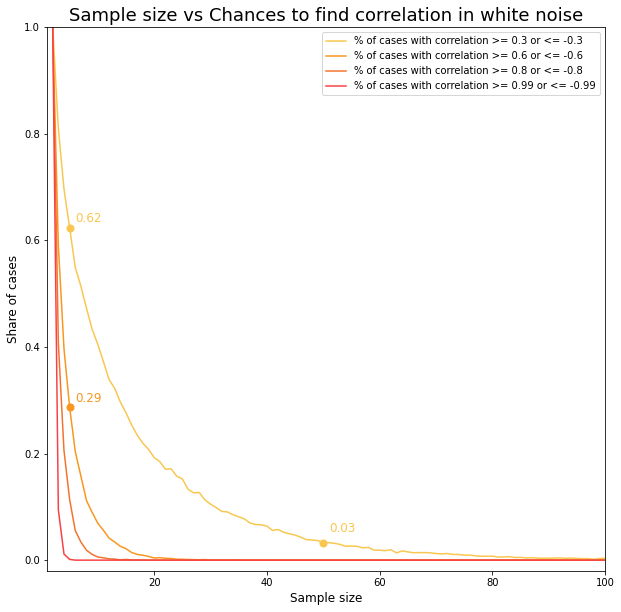

In [11]:
bbox_args = dict(boxstyle='round', fc='0.8')
arrow_args = dict(arrowstyle='->')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(results['sample size'], results['% of cases with correlation >= 0.3 or <= -0.3'], 
        label='% of cases with correlation >= 0.3 or <= -0.3', 
        color='#f9c74f')
ax.plot(results['sample size'], results['% of cases with correlation >= 0.6 or <= -0.6'], 
        label='% of cases with correlation >= 0.6 or <= -0.6', 
        color='#f8961e')
ax.plot(results['sample size'], results['% of cases with correlation >= 0.8 or <= -0.8'], 
        label='% of cases with correlation >= 0.8 or <= -0.8', 
        color='#f3722c')
ax.plot(results['sample size'], results['% of cases with correlation >= 0.99 or <= -0.99'], 
        label='% of cases with correlation >= 0.99 or <= -0.99', 
        color='#f94144')
ax.set_xlim(1, 100)
ax.set_ylim(-0.02, 1)

# values for certain sample sizes
# ax.axvline(5, color='#6c757d', linestyle='--', linewidth=1)
# ax.axvline(50, color='#6c757d', linestyle='--', linewidth=1)

# add labels for % of cases with correlation >= 0.3 or <= -0.3
ax.scatter(x=5, y=results['% of cases with correlation >= 0.3 or <= -0.3'][3], marker='o', color='#f9c74f', s=50)
ax.text(s=round(results['% of cases with correlation >= 0.3 or <= -0.3'][3], 2), 
        x=6, 
        y=results['% of cases with correlation >= 0.3 or <= -0.3'][3]+0.01, 
        color='#f9c74f', 
        fontsize=12)

ax.scatter(x=50, y=results['% of cases with correlation >= 0.3 or <= -0.3'][48], marker='o', color='#f9c74f', s=50)
ax.text(s=round(results['% of cases with correlation >= 0.3 or <= -0.3'][48], 2), 
        x=51, 
        y=results['% of cases with correlation >= 0.3 or <= -0.3'][48]+0.02, 
        color='#f9c74f', 
        fontsize=12)

# add labels for % of cases with correlation >= 0.6 or <= -0.6
ax.scatter(x=5, y=results['% of cases with correlation >= 0.6 or <= -0.6'][3], marker='o', color='#f8961e', s=50)
ax.text(s=round(results['% of cases with correlation >= 0.6 or <= -0.6'][3], 2), 
        x=6, 
        y=results['% of cases with correlation >= 0.6 or <= -0.6'][3]+0.01, 
        color='#f8961e', 
        fontsize=12)

# add title, axis names, legend
ax.legend()
plt.xlabel('Sample size', fontsize=12)
plt.ylabel('Share of cases', fontsize=12)
plt.title('Sample size vs Chances to find correlation in white noise', fontsize=18);

## Conclusion   
The fact that the fewer data points we have the worse they describe the data had been obvious even before we performed the simulation, the question is how many observations do we need to be able make conclusions. Well, it depends on how the data looks like. In the case above we did experiments on "white noise", the data where both x and y are equally likely to be between 0 and 100.
The simulation shows that even random chose of small number of observations (~10 or less) leads to substantial probability of finding moderate or even strong correlation between the observations drawn from white noise. To reduce such an error, I would recommend to collect at least 20 observations (almost eliminating chances to find correlation 0.6+ when the data is completely uncorrelated), and better grow sample up to 100 observations, to have representative data.

## Links  
1. "User's guide to correlation coefficient" (Turkish Journal of Emergency Medicine), Haldun Akoglu, Marmara University School of Medicine, Department of Emergency Medicine, Istanbul, Turkey. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/pdf/main.pdf  
  
2. Primer of Biostatistics, Seventh Edition, Stanton A. Glantz, PhD. 2012 by The McGraw-Hill Companies, Inc.
